In [9]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactive='all'

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.metrics import roc_curve, accuracy_score, f1_score, auc, confusion_matrix, roc_auc_score
from xgboost.sklearn import XGBClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier



ModuleNotFoundError: No module named 'xgboost'

In [7]:
#loading and reading the data
df= pd.read_excel("D:\wine quality prediction.xlsx")

In [8]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0  
3      9.8      6.0  
4      9.4      5.0

In [9]:
df1= df.copy

In [10]:
df.shape

(1599, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [12]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1598.000000  1599.000000   
mean      0.087467            15.874922             46.433041     0.996747   
std       0.047065            10.460157             32.876249     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1598.000000  1599.000000  1599.000000  1598.000000  
mean      3.498586     0.658149    10.422983     5.636421  
std       0.080346     0.169507     1.065668     0.807665  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.520000     0.550000     9.500000     5.000000  
50%       3.520000     0.620000    10.200000     6.000000  
75%       3.520000     0.730000    11.100000     6.000000  
max       3.900000     2.000000    14.900000     8.000000

In [13]:
df.size

19188

In [14]:
df.ndim

2

In [15]:
#finding unique values
df.nunique

<bound method DataFrame.nunique of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.

In [16]:
# finding missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [17]:
df.fillna(value=0, inplace=True)

In [18]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
# finding the duplicates 
df.duplicated().sum()

239

In [20]:
#dropping the duplicates
df.drop_duplicates()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
33              6.9             0.605         0.12           10.70      0.073   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
38              5.7             1.130         0.09            1.50      0.172   
39              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
42              7.5             0.490         0.20            2.60      0.332   
43              8.1             0.660         0.22            2.20      0.069   
44              6.8             0.670         0.02            1.80      0.050   
45              4.6             0.520         0.15            2.10      0.054   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400         0.23            1.60      0.066   
49              5.6             0.310         0.37            1.40      0.074   
50              8.8             0.660         0.26            1.70      0.074   
51              6.6             0.520

In [21]:
# basic statistics
round(df.describe(exclude='object'), 2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.40     1.00     3.50   
std         0.05                10.46                 32.89     0.00     0.12   
min         0.01                 1.00                  0.00     0.99     0.00   
25%         0.07                 7.00                 22.00     1.00     3.52   
50%         0.08                14.00                 38.00     1.00     3.52   
75%         0.09                21.00                 62.00     1.00     3.52   
max         0.61                72.00                289.00     1.00     3.90   

       sulphates  alcohol  quality  
count    1599.00  1599.00  1599.00  
mean        0.66    10.42     5.63  
std         0.17     1.07     0.82  
min         0.33     8.40     0.00  
25%         0.55     9.50     5.00  
50%         0.62    10.20     6.00  
75%         0.73    11.10     6.00  
max         2.00    14.90     8.00

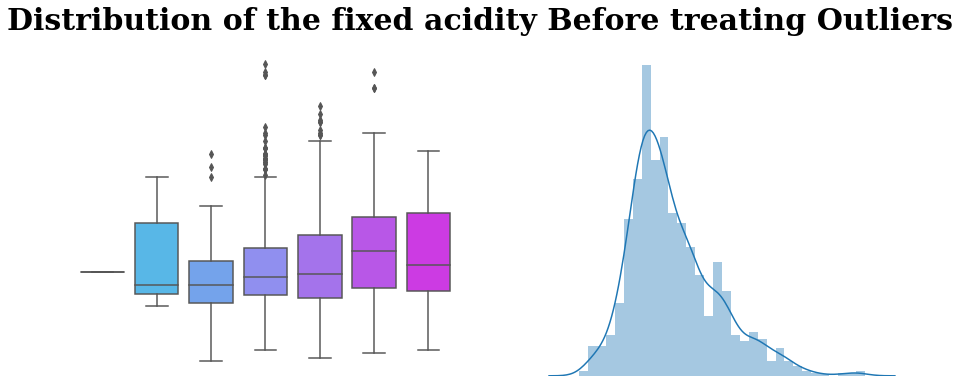

In [22]:
# feature analysis and also detecting outliers
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the fixed acidity Before treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["fixed acidity"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["fixed acidity"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()



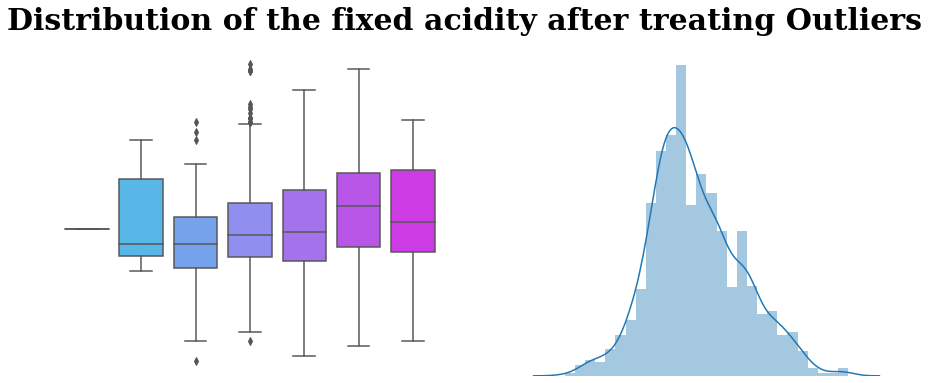

In [24]:
df["Log_fixed acidity"]= np.log(df["fixed acidity"])
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the fixed acidity after treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["Log_fixed acidity"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["Log_fixed acidity"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()



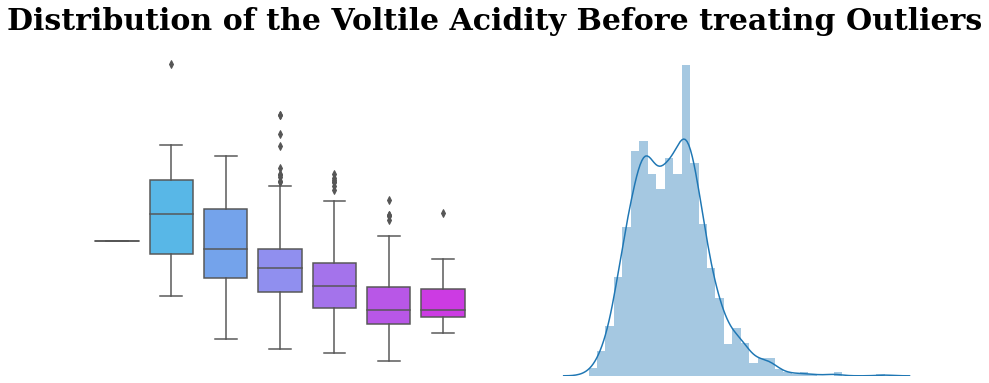

In [25]:
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the Voltile Acidity Before treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["volatile acidity"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["volatile acidity"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()



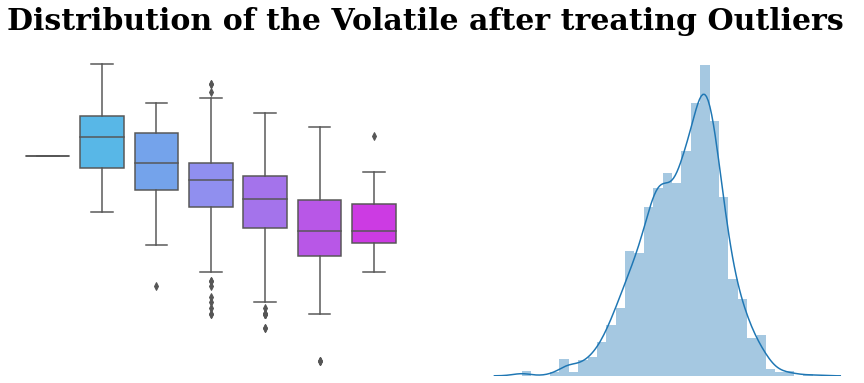

In [26]:
df["Log_Volatile acidity"]= np.log(df["volatile acidity"])
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the Volatile after treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["Log_Volatile acidity"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["Log_Volatile acidity"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()



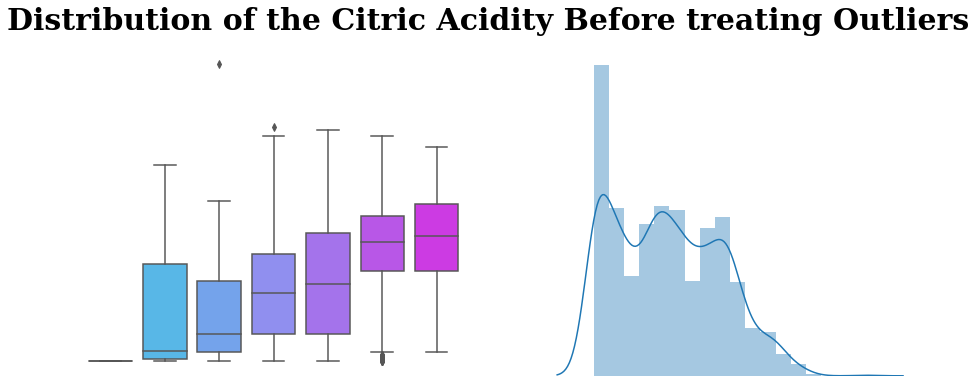

In [27]:
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the Citric Acidity Before treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["citric acid"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["citric acid"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()



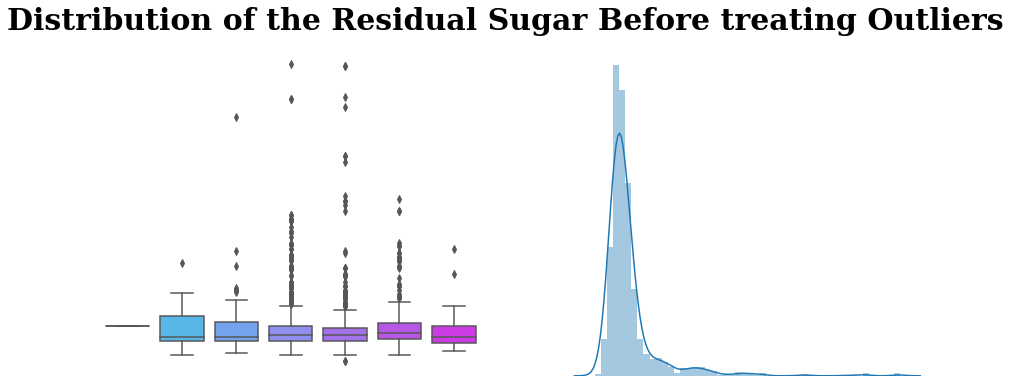

In [29]:
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the Residual Sugar Before treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["residual sugar"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["residual sugar"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()



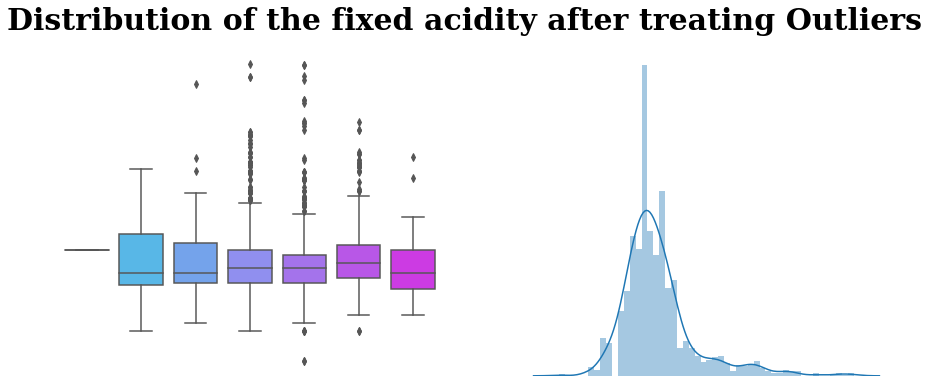

In [31]:
df["Log_residual sugar"]= np.log(df["residual sugar"])
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the fixed acidity after treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["Log_residual sugar"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["Log_residual sugar"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()



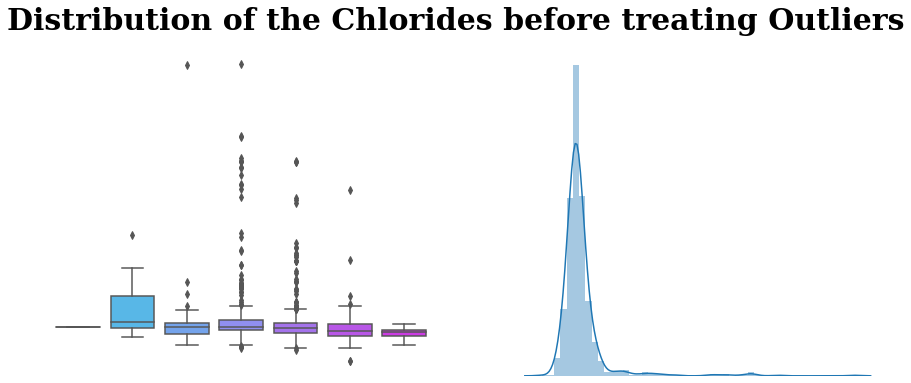

In [32]:
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the Chlorides before treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["chlorides"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["chlorides"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()



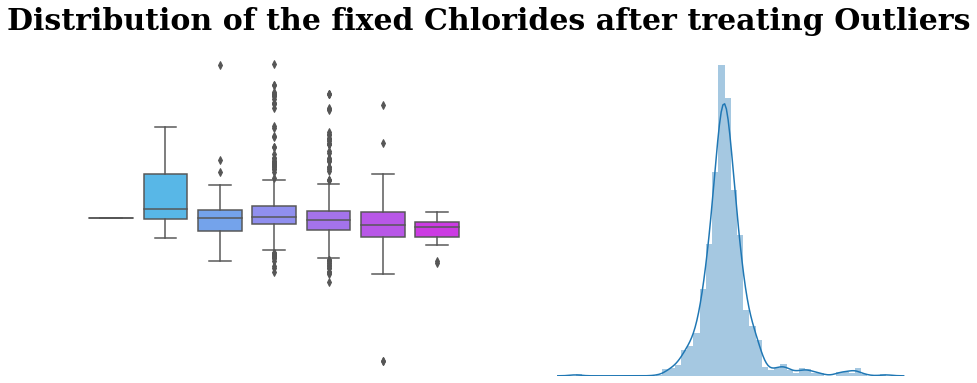

In [33]:
df["Log_chlorides"]= np.log(df["chlorides"])
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the fixed Chlorides after treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["Log_chlorides"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["Log_chlorides"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()



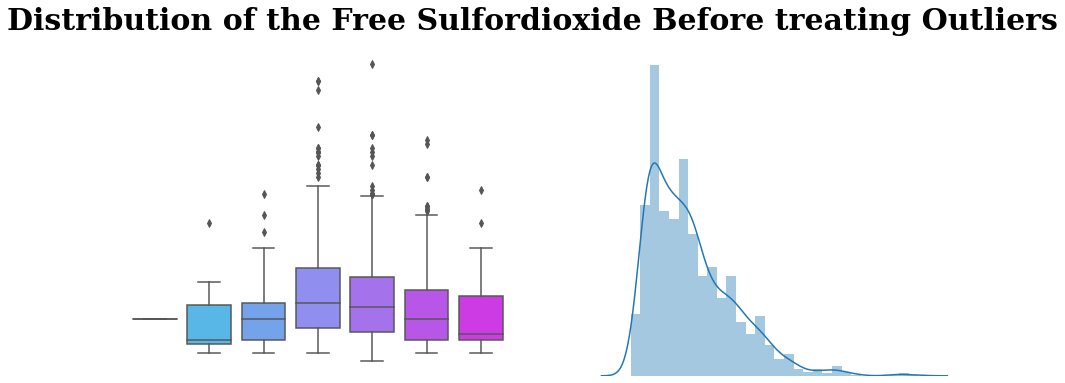

In [34]:
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the Free Sulfordioxide Before treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["free sulfur dioxide"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["free sulfur dioxide"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()



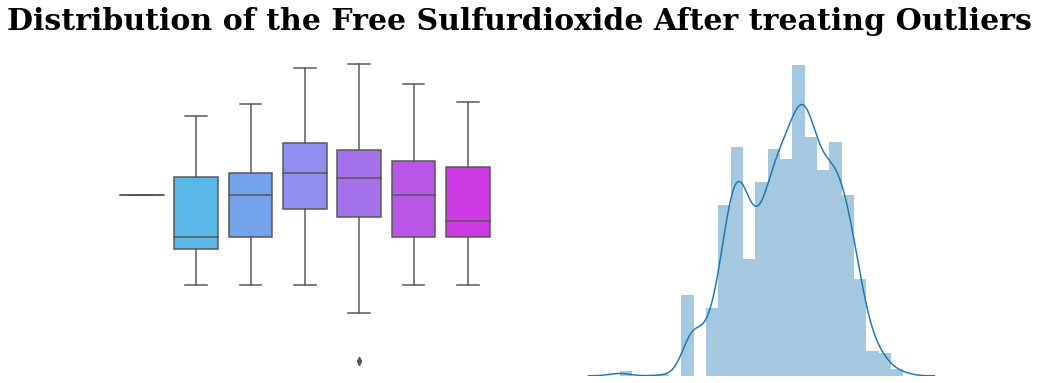

In [35]:
df["Log_free sulfur dioxide"]= np.log(df["free sulfur dioxide"])
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the Free Sulfurdioxide After treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["Log_free sulfur dioxide"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["Log_free sulfur dioxide"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()

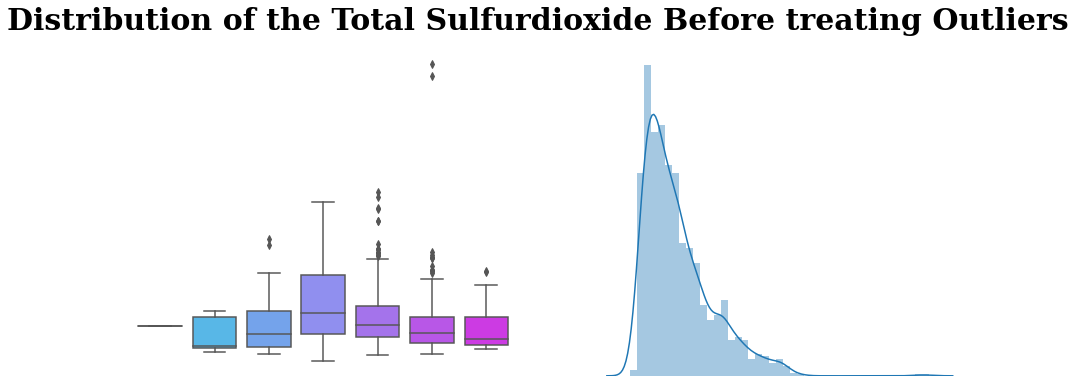

In [36]:
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the Total Sulfurdioxide Before treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["total sulfur dioxide"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["total sulfur dioxide"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()

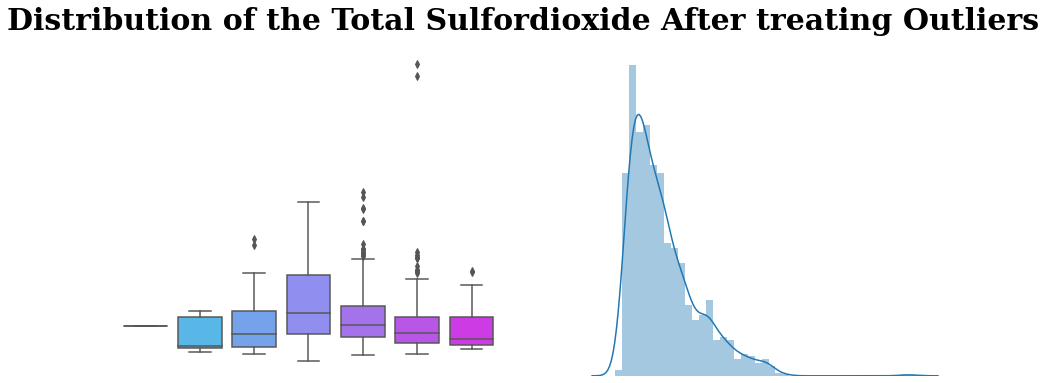

In [37]:
df["Log_total sulfur dioxide"]= np.log(df["total sulfur dioxide"])
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the Total Sulfordioxide After treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["total sulfur dioxide"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["total sulfur dioxide"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()

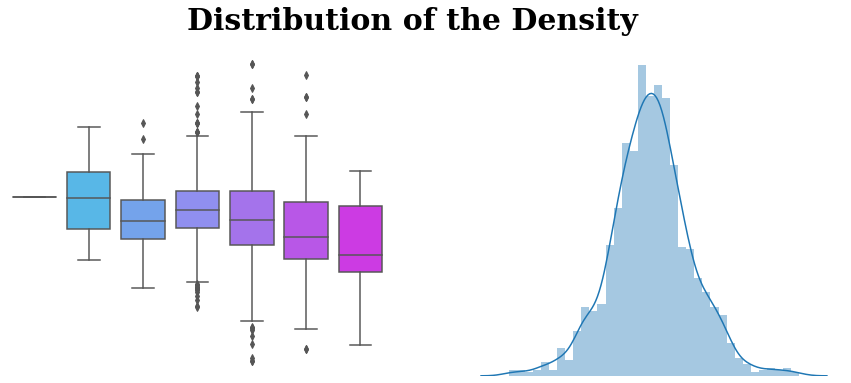

In [38]:
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the Density', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["density"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["density"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()

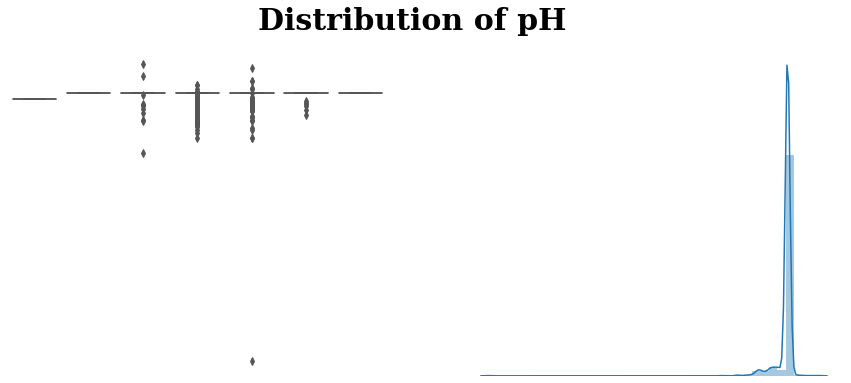

In [39]:
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of pH', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["pH"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["pH"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()

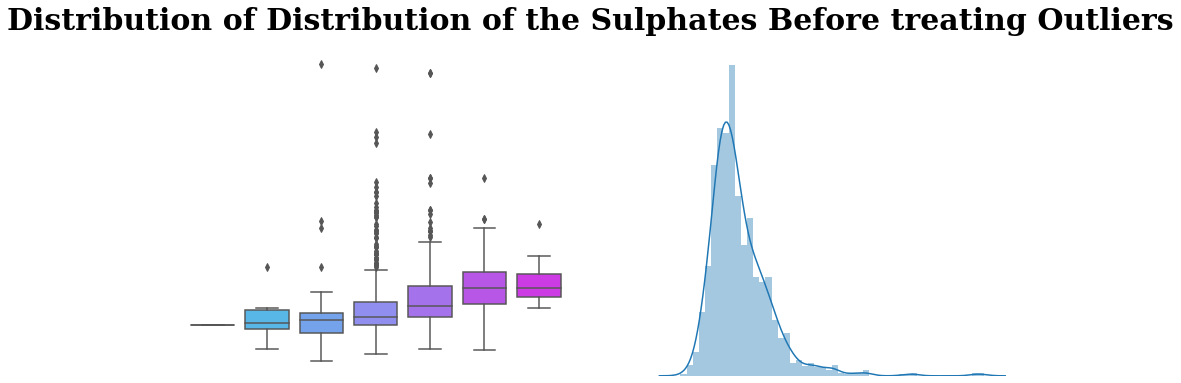

In [40]:
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of Distribution of the Sulphates Before treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["sulphates"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["sulphates"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()

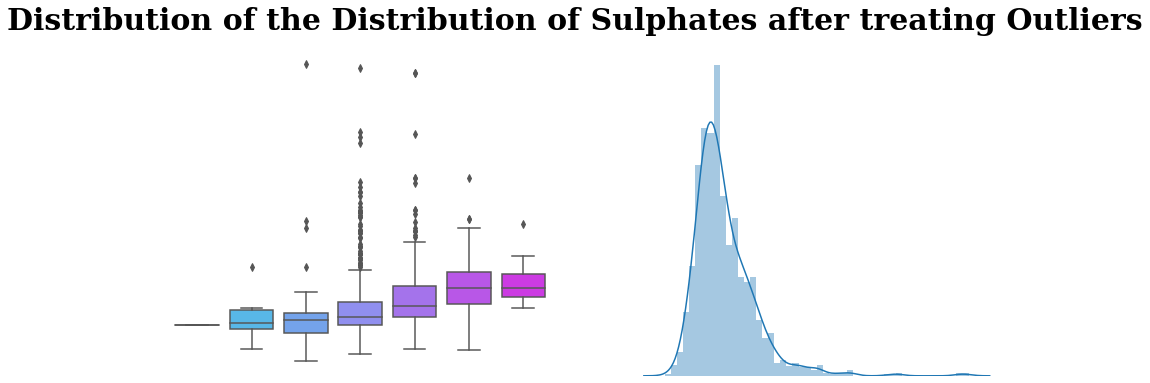

In [41]:
df["Log_sulphates"]= np.log(df["sulphates"])
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the Distribution of Sulphates after treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["sulphates"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["sulphates"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()

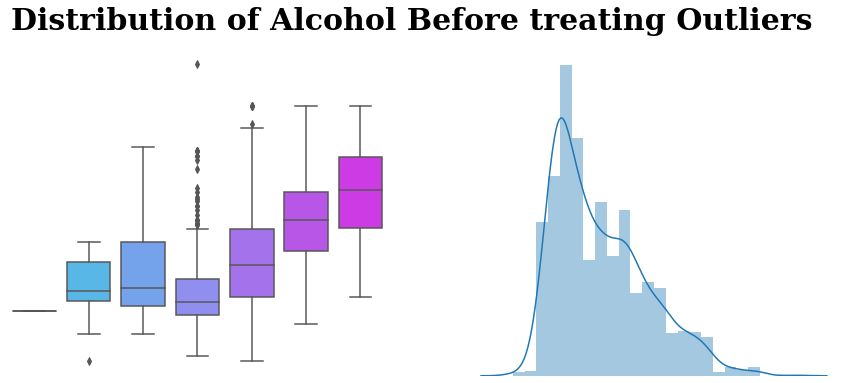

In [42]:
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of Alcohol Before treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["alcohol"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["alcohol"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()

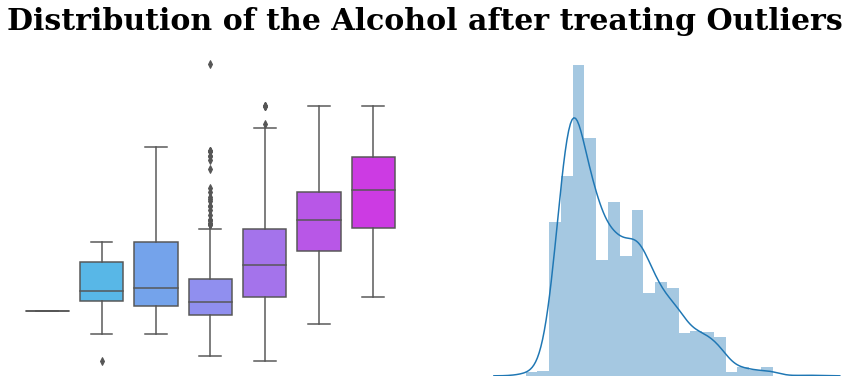

In [43]:
df["Log_alcohol"]= np.log(df["alcohol"])
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle('Distribution of the Alcohol after treating Outliers', fontsize= 30, fontweight= 'bold')

ax1= fig.add_subplot(121)
ax1= sns.boxplot(x= df["quality"], y= df["alcohol"], palette= "cool")
plt.axis('off')

ax2= fig.add_subplot(122)
x=df["alcohol"]
ax2= sns.distplot(x)
plt.axis('off')
plt.show()

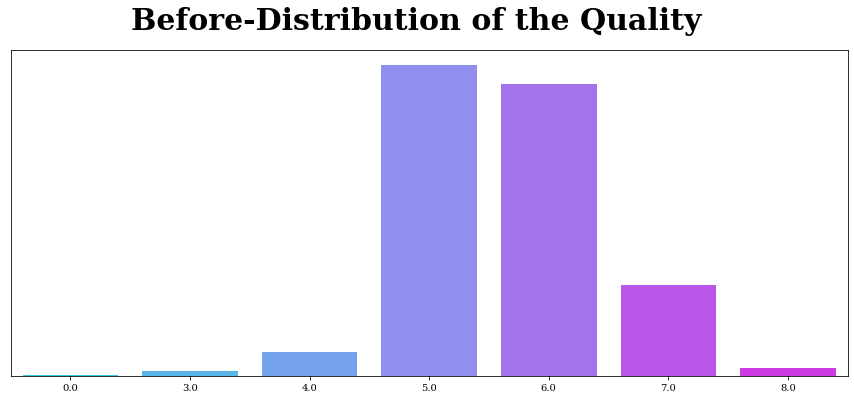

In [44]:
# 9. Feature Engineering and feature Transformation

plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle ('Before-Distribution of the Quality', fontsize= 30, fontweight= 'bold')
ax= sns.barplot( y= df['quality'].value_counts().values.tolist(), x= df["quality"].value_counts().index, palette="cool")
ax.get_yaxis().set_visible(False)
plt.show()

In [45]:
# Feature Engineering
bins= (2, 6.5, 8)
group_names=['good', 'bad']
df['quality']=pd.cut(df['quality'], bins= bins, labels= group_names)

# feature transformation
df['quality'].replace({'good':1, 'bad':0})


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       0.0
8       0.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      0.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
30      1.0
31      1.0
32      1.0
33      1.0
34      1.0
35      1.0
36      1.0
37      0.0
38      1.0
39      1.0
40      1.0
41      1.0
42      1.0
43      1.0
44      1.0
45      1.0
46      1.0
47      1.0
48      1.0
49      1.0
50      1.0
51      1.0
52      1.0
53      1.0
54      1.0
55      1.0
56      1.0
57      1.0
58      1.0
59      1.0
60      1.0
61      1.0
62      0.0
63      1.0
64      1.0
65      1.0
66      1.0
67      1.0
68      1.0
69      1.0
70      1.0
71      1.0
72      1.0
73      1.0
74      1.0
75      1.0
76      1.0
77      1.0
78      1.0
79      1.0
80      1.0
81      1.0
82      1.0
83  

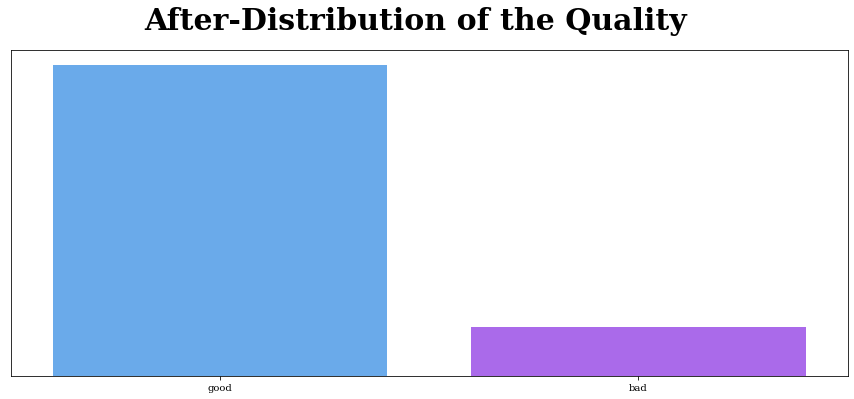

In [46]:
plt.rcParams['font.family']=['serif']
background_color = "#ffffff"
fig= plt.figure(figsize=(15,6), facecolor= "white")
fig.suptitle ('After-Distribution of the Quality', fontsize= 30, fontweight= 'bold')
ax= sns.barplot( y= df['quality'].value_counts().values.tolist(), x= df["quality"].value_counts().index, palette="cool")
ax.get_yaxis().set_visible(False)
plt.show()

In [47]:
# 10.Dropping the reduandant columns
df.drop(columns=['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                'sulphates', 'alcohol'], axis= True, inplace=True)


In [48]:
# Rearrangement of the columns
df= df[['Log_fixed acidity', 'Log_Volatile acidity', 'citric acid', 'Log_residual sugar', 'Log_chlorides', 'Log_free sulfur dioxide', 
       'Log_total sulfur dioxide', 'density', 'pH', 'Log_sulphates', 'Log_alcohol', 'quality']]


In [49]:
df.head()

Log_fixed acidity  Log_Volatile acidity  citric acid  Log_residual sugar  \
0           2.001480             -0.356675         0.00            0.641854   
1           2.054124             -0.127833         0.00            0.955511   
2           2.054124             -0.274437         0.04            0.832909   
3           2.415914             -1.272966         0.56            0.641854   
4           2.001480             -0.356675         0.00            0.641854   

   Log_chlorides  Log_free sulfur dioxide  Log_total sulfur dioxide  density  \
0      -2.577022                 2.397895                  3.526361   0.9978   
1      -2.322788                 3.218876                  4.204693   0.9968   
2      -2.385967                 2.708050                  3.988984   0.9970   
3      -2.590267                 2.833213                  4.094345   0.9980   
4      -2.577022                 2.397895                  3.526361   0.9978   

     pH  Log_sulphates  Log_alcohol quality  
0  3.51      -0.579818     2.240710    good  
1  3.20      -0.385662     2.282382    good  
2  3.26      -0.430783     2.282382    good  
3  3.16      -0.544727     2.282382    good  
4  3.51      -0.579818     2.240710    good

<Figure size 1080x504 with 0 Axes>

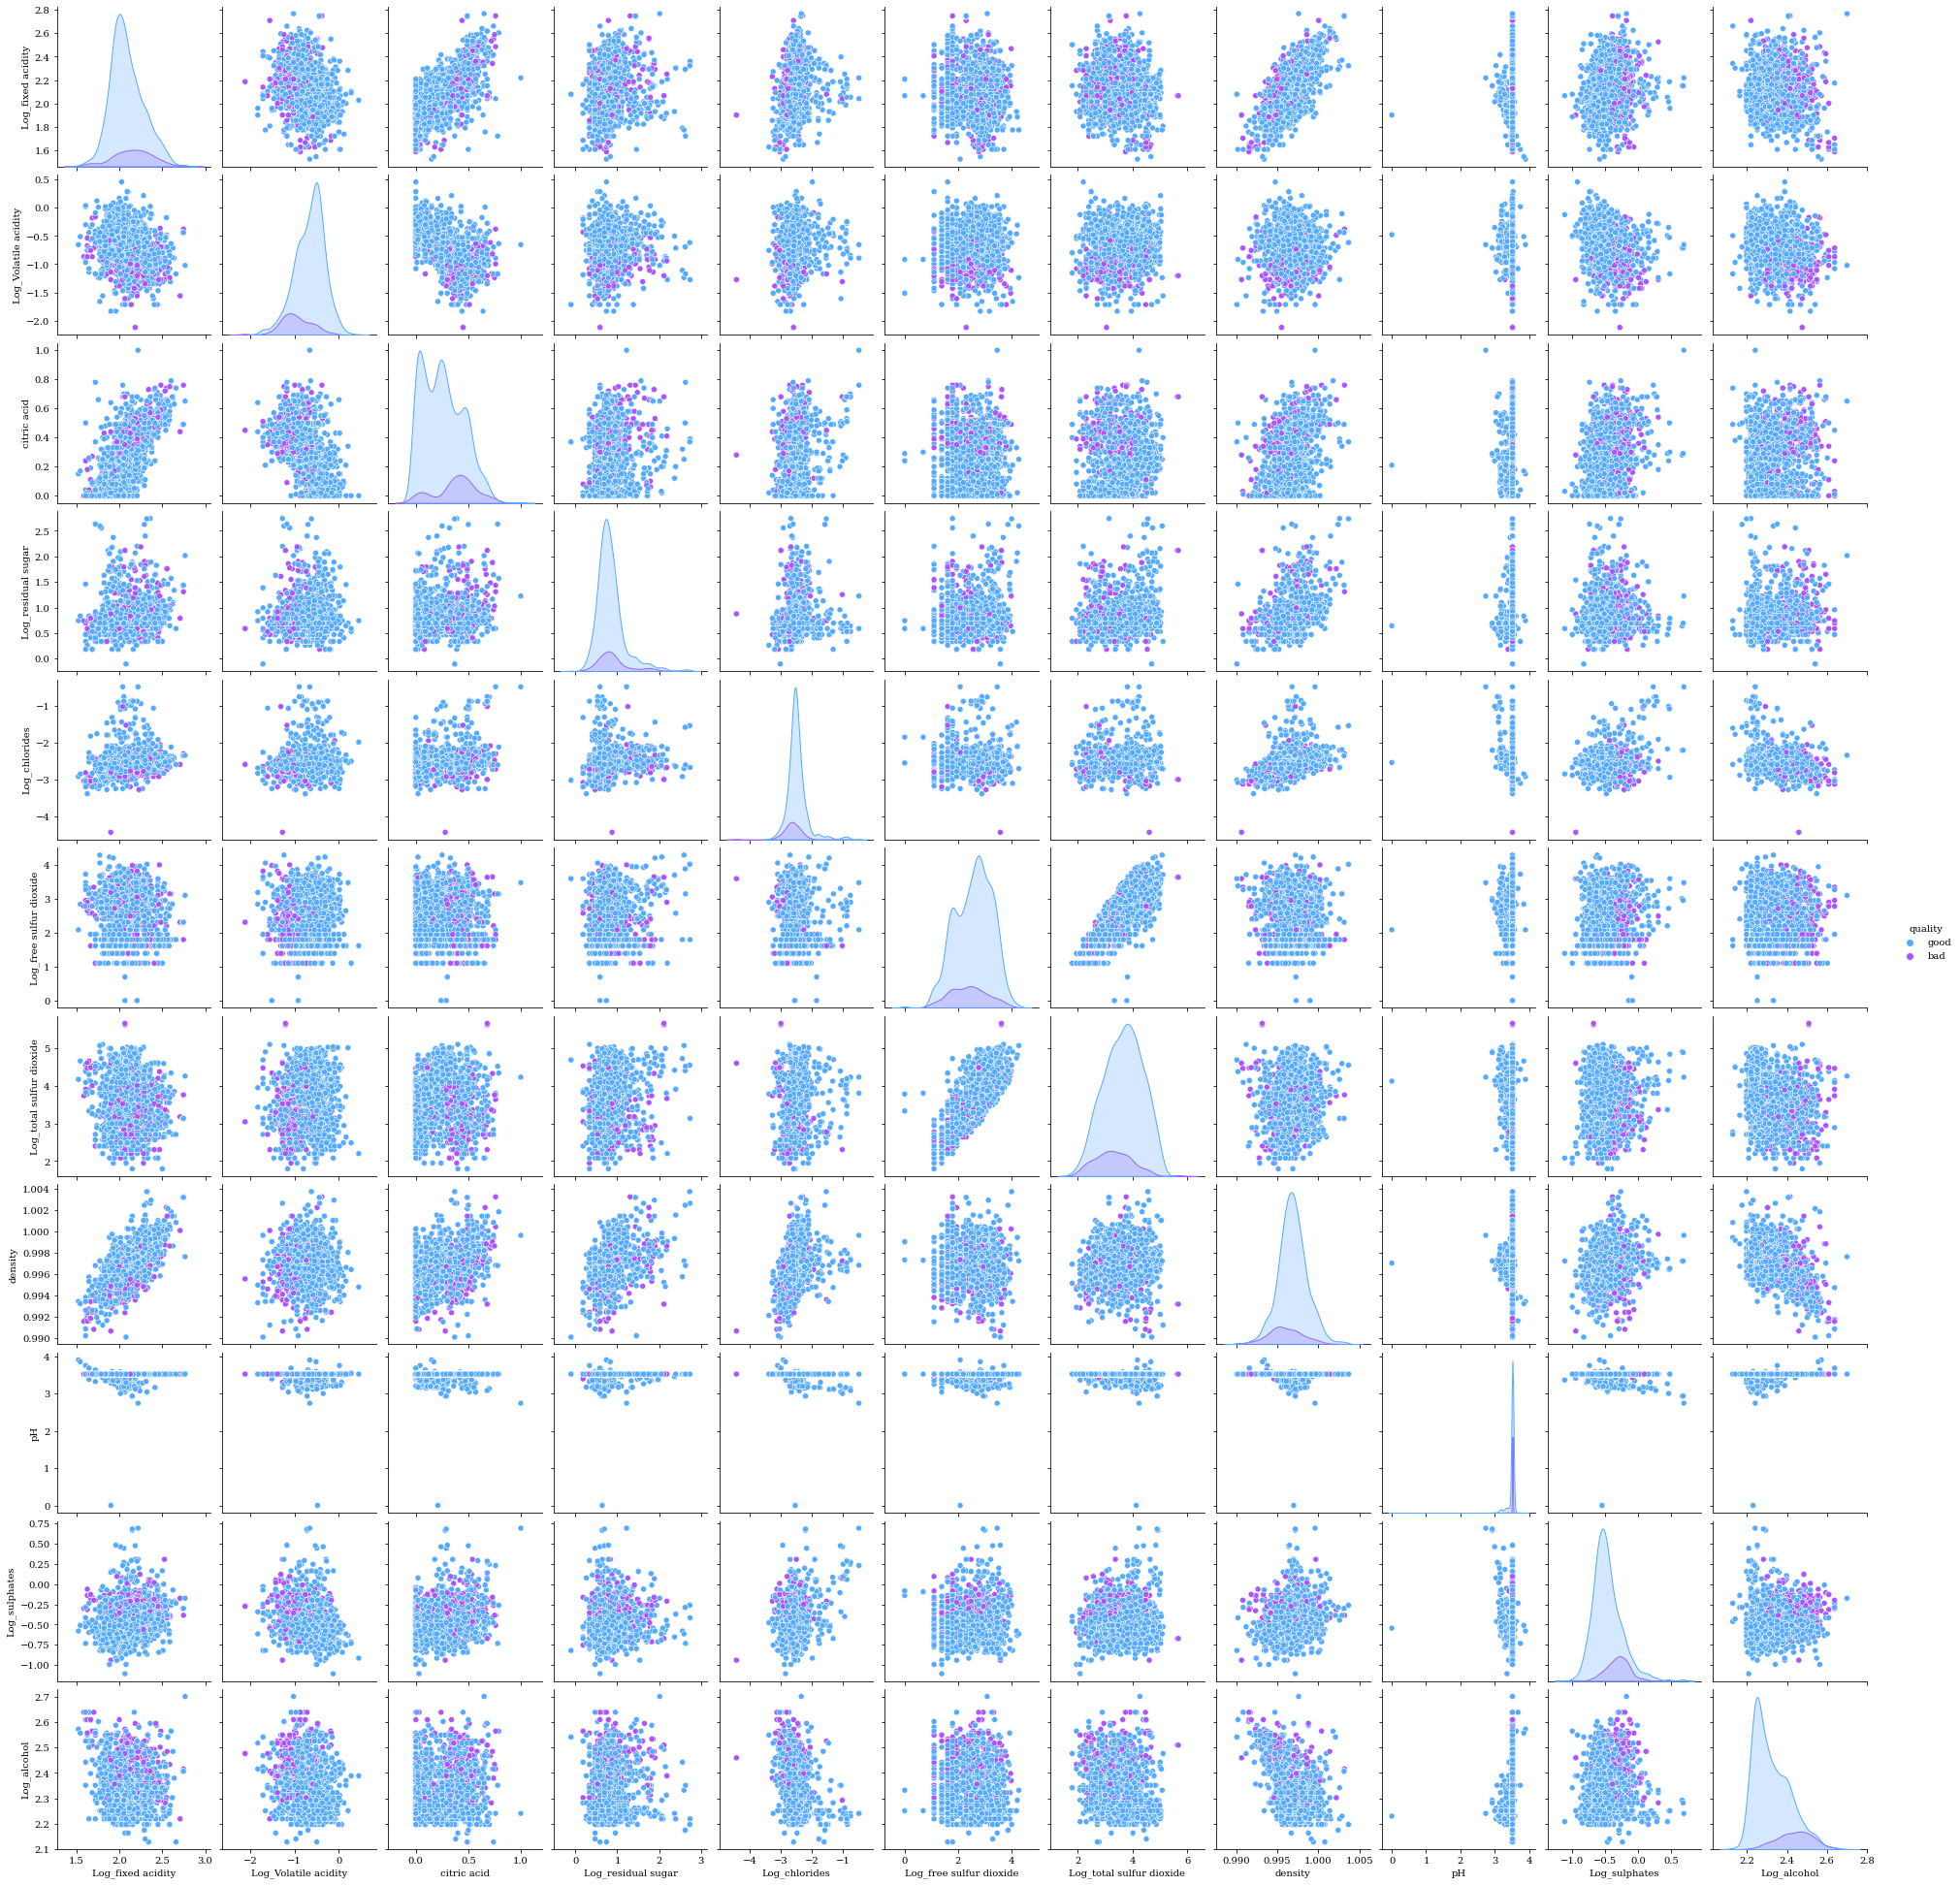

In [50]:
# checking the relationship between the features
background_color= "#ffffff"
fig= plt.figure(figsize=(15,7), facecolor= background_color)
sns.pairplot(df, hue= 'quality', palette="cool")

<AxesSubplot:>

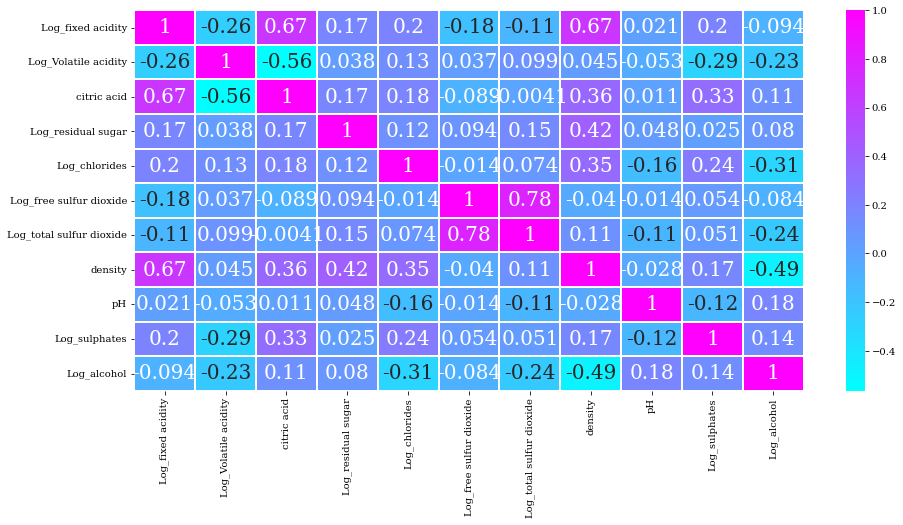

In [51]:
background_color= "#ffffff"
fig= plt.figure(figsize=(15,7), facecolor= background_color)
sns.heatmap(df.corr(),annot= True, cmap="cool", linewidths=2, linecolor="white", cbar=True, annot_kws={"size":20})


NameError: name 'df' is not defined

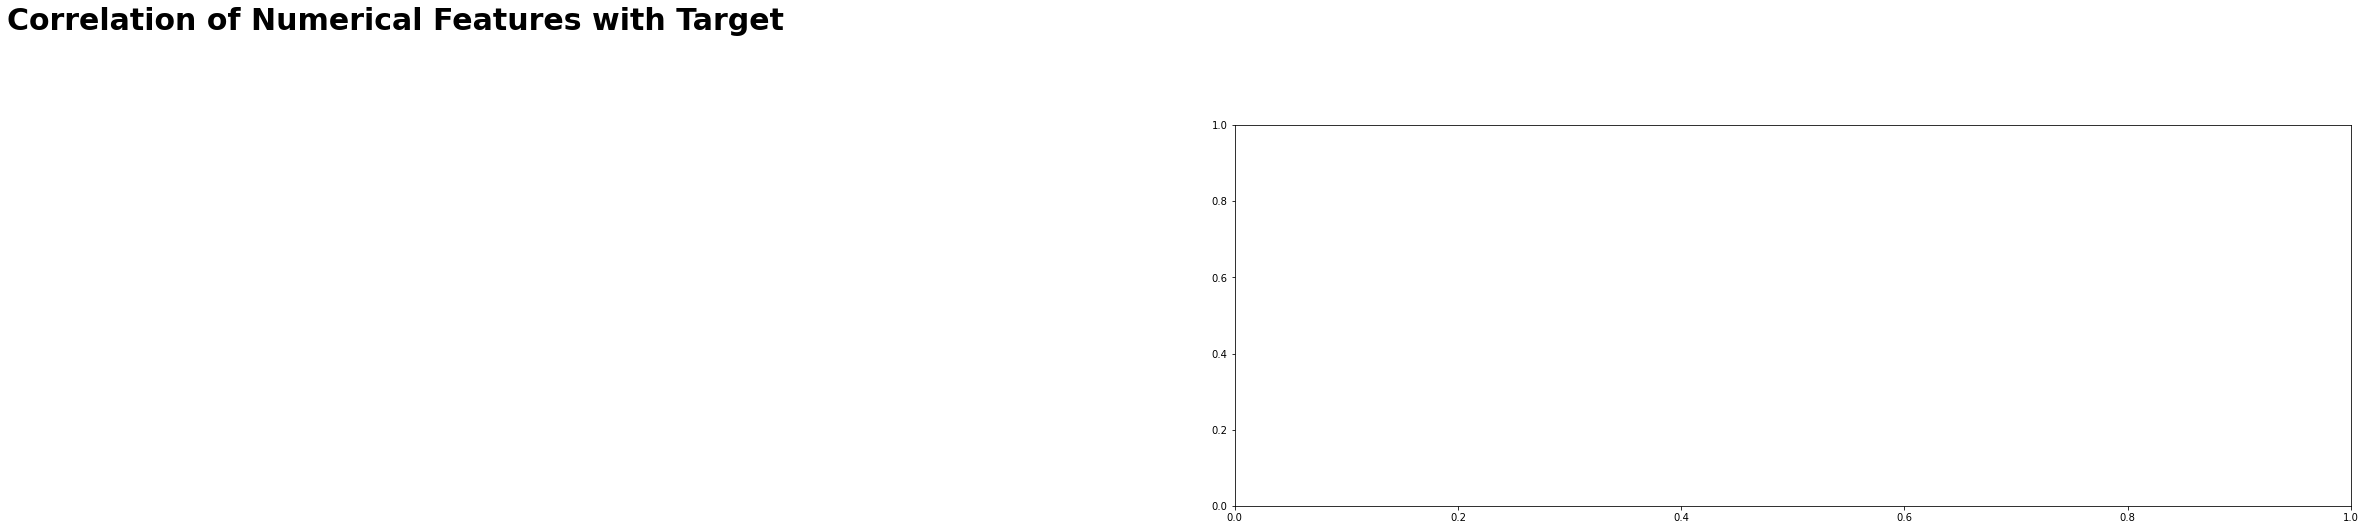

In [12]:
background_color = "#ffffff"
fig = plt.figure(figsize=(20,7), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=30, fontweight='bold')

chart_df = pd.DataFrame(df.corr(df['quality']))
chart_df.columns = ['corr']
sns.barplot(x= chart_df.index, y= chart_df['corr'], ax= ax0, palette='cool', edgecolor="black", linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color="#EEEEEE", linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color="#EEEEEE", linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", "left"]:
    ax0.spines[s].set_visible(False)

plt.show()

# Dimensionality Reduction using PCA

In [54]:
# PCA Implementation
#feature variable
x= df.drop('quality', axis=1)
#target variable
y= df['quality']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=44)

In [85]:
# applying PCA for Dimensionality Reduction
pca= PCA(n_components = None)
x_train= pca.fit_transform(x_train)
x_test= pca.fit_transform(x_test)
explained_variance= pca.explained_variance_ratio_
print(explained_variance)

NameError: name 'x_train' is not defined

In [58]:
len(explained_variance)

NameError: name 'explained_variance' is not defined

In [ ]:
print("Sorted list returned:")
print(sorted(explianed_variance, reverse= True))

In [63]:
background_color="#ffffff"
fig= plt.figure(figsize=(20,8), facecolor= background_color)
plt.bar(range(11), explained_variance, alpha= 0.5, align='center', label='Individual Explained Variance')
plt.ylabel("Explained Variance Ratio", fotsize=18)
plt.xlabel("Principal Components", fontsize= 18)
plt.title("Explained Variance Ratio vs Principal Components", font_size=25)
plt.legend(loc='best', fontsize=18)
plt.tight_layout()
plt.show()



NameError: name 'explained_variance' is not defined

<Figure size 1440x576 with 0 Axes>

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca= PCA(n_components= 5)
x_train= pca.fit_transform(x_train)
x_test= pca_trsnsform(x_test)
explained_variance= pca.explained_variance_ratio_
print(explained_variance)


In [84]:
# Model Creation
# Cross validation on different set of algorithm
kfold= StratifiedKFold(n_splits=8, shuffle=True, random_state=42)


rs=15
clrs= []


clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(DecisionTreeClassifier(random_state=rs))

cv_results=[]
for clr in clrs:
    cv_results.append(cross_val_score(clr, x_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1 ))
    
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df= pd.DataFrame({"CrossVal_Score_Means": cv_means, "CrossValerrors": cv_std, "Algo":["RandomForestClassifier",
        "AdaBoostClassifier", "Gradient Boosting", 'DecisionTreeClassifier']})
g= sns.barplot("CrossVal_Score_Means", "Algo", data= cv_df, orient="h",**{'xerr:cv_std'}, palette='cool', edgecolor='black',
              linewidth=3)
g=set_xlabel("Mean Accuracy", fontsize= 18)
g=g.set_title("Cross validation scores", fontsize=24)
plt.figure(figsize=(15,8))
print(cv_df)



NameError: name 'x_train' is not defined

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train, Y_train)
Y_pred= dtc.predict(x_test)
confusion_matrix( Y_test, Y_pred)



NameError: name 'x_train' is not defined

In [ ]:
print(classification_report(Y_train, Y_pred))

In [ ]:
print(accuracy_report(Y_train, Y_pred))

# Hyper parameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params={
    'criterion':['gini', 'entropy']
    'max_depth':[3,5,7,10],
    'min_samples_split': range[2,10,1],
    'min_samples_leaf': range[2,10,1]
}

gridsearch= GridSearchCV(dtc, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, Y_train)

In [ ]:
dtc= grid_search.best_estimator_
Y_pred= dtc.predict(x_test)

In [ ]:
print(accuracy_score(Y_test, Y_pred))

In [ ]:
# best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
# final model
ada = AdaBoostClassifier(base_estimator = dtc, algorithm= "SAMME", learning_rate= 0.1, n_estimators= 90)
ada.fit(x_train, Y_train)

In [ ]:
print(confusion_matrix(Y_test, Y_pred))

In [ ]:
print(classification_report(Y_test, Y_pred))

In [ ]:
print(accuracy_score(Y_test, Y_pred))

In [ ]:
# conclusion
Since the dataset is an imbalanced dataset I tried using only tree-based algorithms like Ada boost, Decision tree, Random forest tree, etc.
The advantages of any tree-based algorithm are - it is specialized in working with the imbalanced dataset.
For this prediction ada boosting classification is giving use a very good accuracy i,e
Meanwhile, you can use your favorite classification model and get good accuracy.
Please share your feedback through comments and let me know how to improve model performance, visualization, or something in this kernel.